## Exploratory Data Analysis (EDA) : Super market sales dataset
In this project, we plan to perform an exploratory analysis of data related to the activities of a supermarket. The dataset is obtained from Kaggle and contains information on products sold, branches, their cities, customers, quantities sold and dates, etc.

### Table of Contents
 - Introduction
 - Dataset
 - Libraries Used
 - Data Cleaning
 - Univariate Analysis
 - Bivariate Analysis
 - Analysis for Continents
 - Key Findings

### Introduction

The growth of supermarkets in most populated cities are increasing and market competitions are also high. Exploratory Data Analysis (EDA) is all about using data to gain insights that help in making informed decisions. It’s the first step in any data-driven project, where you explore and understand your data before applying complex models or making strategic moves. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.  

### 1.  Import Python Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 2.  Reading dataset

In [189]:
data = pd.read_csv("supermarket_sales.csv")

We will analyze the data to understand the general insights contained in the data. 

In [190]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [191]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


#### Understanding Variables

In [192]:
data.shape

(1000, 17)

Les données sont constituées de 17 colonnes et 1000 instances.

In [193]:
# Dataset Columns
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### Variables Description

Invoice id: Computer generated sales slip invoice identification number.

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters.

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer.

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

Unit price: Price of each product in $.

Quantity: Number of products purchased by customer.

Tax: 5% tax fee for customer buying.

Total: Total price including tax.

Date: Date of purchase (Record available from January 2019 to March 2019).

Time: Purchase time (10am to 9pm).

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).

COGS: Cost of goods sold.

Gross margin percentage: Gross margin percentage.

Gross income: Gross income.

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

We can see that no variable has missing values. Numeric variables like quantity are of type int64, and Unit price, Tax 5%, Total,  cogs, gross margin percentage, gross income and Rating are of type float64. Categorical variables like Invoice ID, Branch,City, Customer type, Gender, Product line,Date, Time and Payment are of object type. 

#### missing values/null values

In [195]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We can see here that there is not missing value.

In [196]:
(data.isnull().sum()/(len(data)))*100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

#### Duplicate Values

In [197]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [198]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

there is no duplicated value in our dataset

### 3. Data Cleaning/Wrangling
Some columns or variables can be dropped if they do not add value to our analysis.

1. Invoice ID
- ❌ This is simply a unique identifier. It does not contain any analytical information.
- 📊 We never perform statistical analysis on an ID.

2. Gross Margin Percentage
- ❌ This column has the same value (4.7619%) for all rows.
- ⚠️ No variability → useless for analysis.

3. COGS (Cost of Goods Sold)
- 🔁 This is directly linked to "Total" and "Tax" (Total = COGS + Tax).
- If we already have "Total" and "Tax," we can optionally remove it, unless you want to specifically study profitability.

4. Time
- ⏰ If you don't perform analysis by time of day (e.g., peak hours), you can delete it.

In [199]:
data = data.drop(['Invoice ID', 'gross margin percentage', 'cogs', 'Time'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


### 4. Feature Engineering

### 5. EDA Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset 

####  Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [200]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
Tax 5%,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Total,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
gross income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Rating,1000.0,6.972700,1.718580,4.0000,5.500000,7.000,8.50000,10.00


From the statistical summary, we can infer the following findings:

This table shows that all variables have the same number of instances, i.e., 1,000, indicating that there are no missing values. The minimum price is 10 dollars, the maximum price is approximately $100, and the average is approximately 56 dollars. The quantities sold range from 1 to 10 items, with an average of 5.5 items. Furthermore, customers purchased an average of 323 dollars worth of items.
We note that the variables unit price, quantity, gross margin percentage, total, and rating have a median approximately equal to the mean, indicating that they exhibit a normal distribution, while gross income exhibits positive skewness and Cogs exhibits negative skewness.

#### Identification of outliers

In [201]:
"""     
Q1=data['gross income'].quantile(0.25)
Q3=data['gross income'].quantile(0.75)
IQR=Q3-Q1
data = data[(data['gross income'] >= (Q1 - 1.5 * IQR)) & (data['gross income'] <= (Q3 + 1.5 * IQR))]
data['gross income'].fillna(data['gross income'].mean(), inplace=True)
"""

"     \nQ1=data['gross income'].quantile(0.25)\nQ3=data['gross income'].quantile(0.75)\nIQR=Q3-Q1\ndata = data[(data['gross income'] >= (Q1 - 1.5 * IQR)) & (data['gross income'] <= (Q3 + 1.5 * IQR))]\ndata['gross income'].fillna(data['gross income'].mean(), inplace=True)\n"

In [202]:
"""
Q1=data['cogs'].quantile(0.25)
Q3=data['cogs'].quantile(0.75)
IQR=Q3-Q1
data = data[(data['cogs'] >= (Q1 - 1.5 * IQR)) & (data['cogs'] <= (Q3 + 1.5 * IQR))]
data['cogs'].fillna(data['cogs'].mean(), inplace=True)
"""

"\nQ1=data['cogs'].quantile(0.25)\nQ3=data['cogs'].quantile(0.75)\nIQR=Q3-Q1\ndata = data[(data['cogs'] >= (Q1 - 1.5 * IQR)) & (data['cogs'] <= (Q3 + 1.5 * IQR))]\ndata['cogs'].fillna(data['cogs'].mean(), inplace=True)\n"

#### Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [203]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols=data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date',
       'Payment'],
      dtype='object')
Numerical Variables:
['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']


### 6. EDA Univariate Analysis

#### categorical variables
categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

[Text(0, 0, '340'), Text(0, 0, '332'), Text(0, 0, '328')]

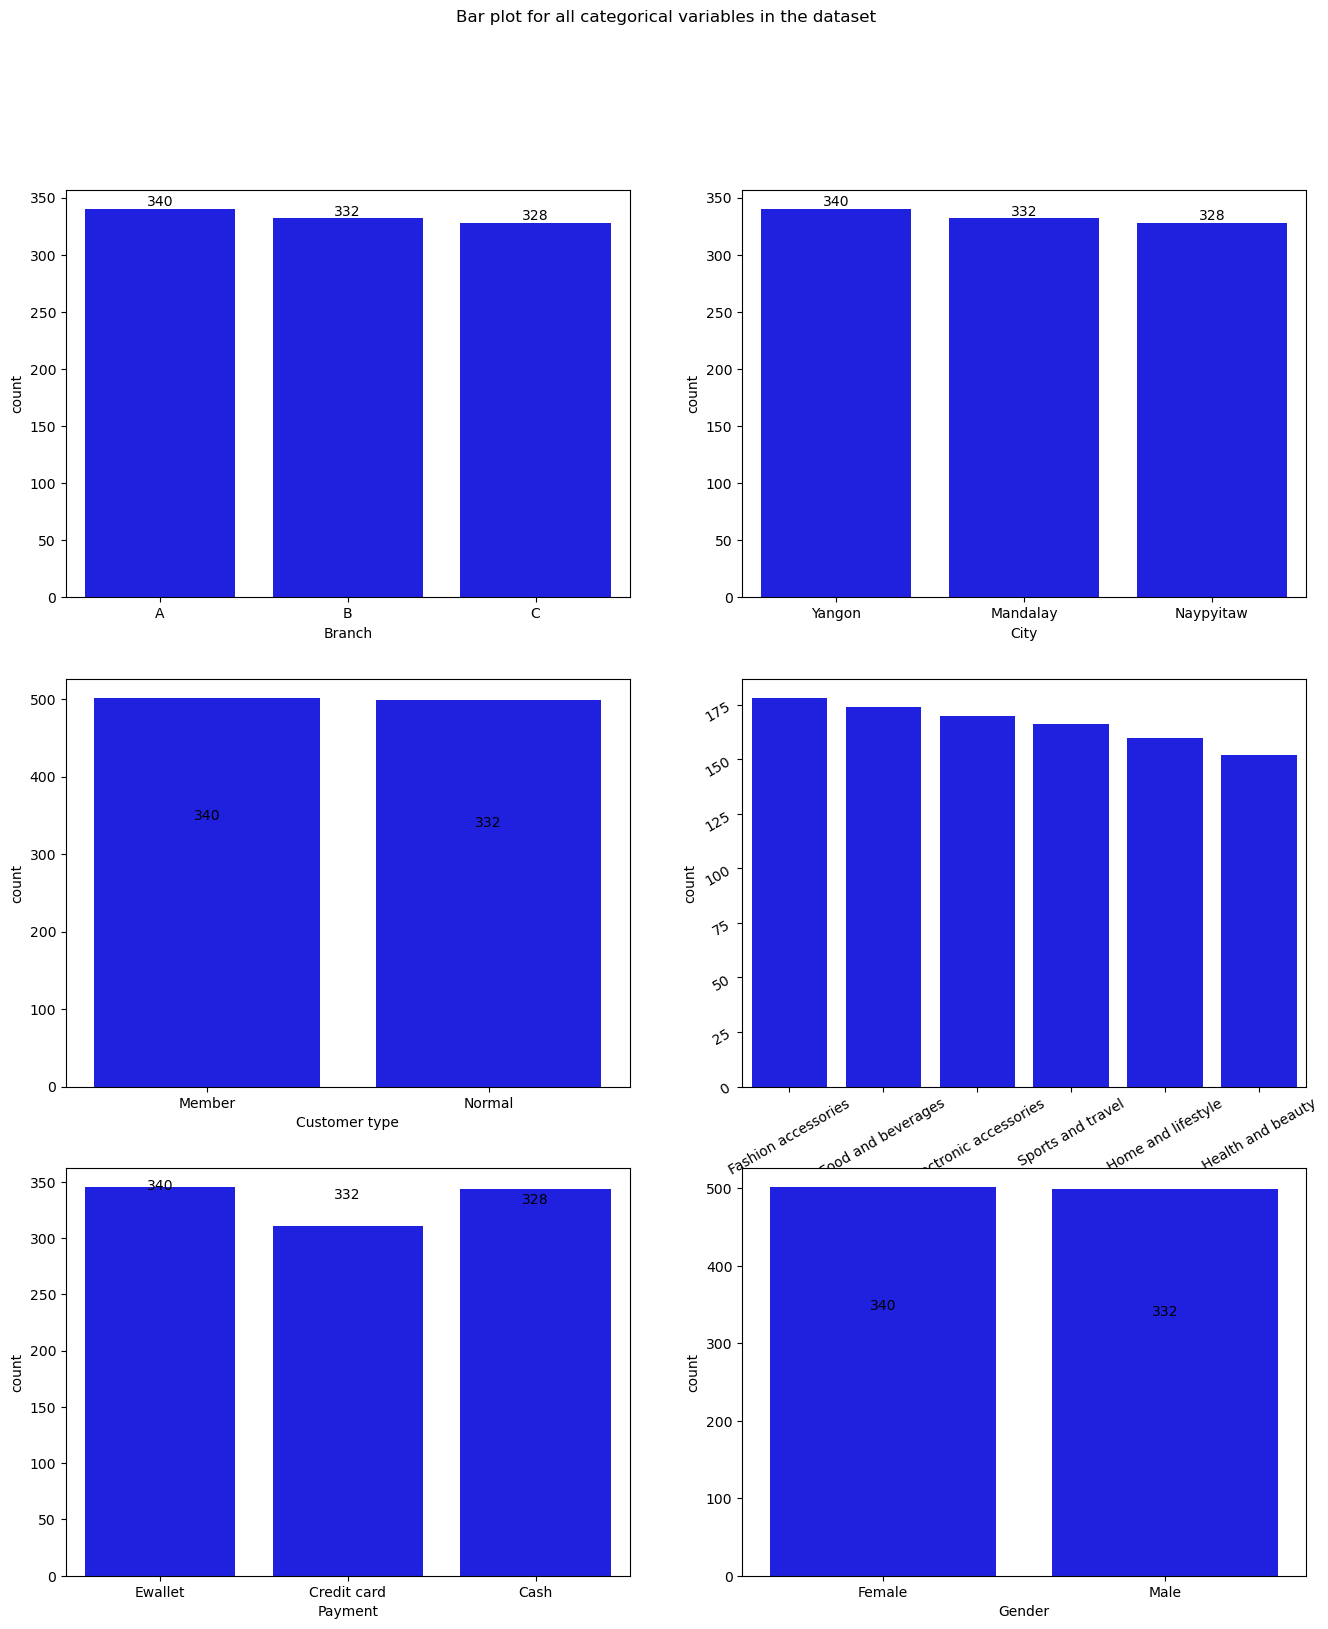

In [204]:
fig, axes = plt.subplots(3, 2, figsize = (16, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Branch', data = data, color = 'blue', 
              order = data['Branch'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'City', data = data, color = 'blue', 
              order = data['City'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Customer type', data = data, color = 'blue', 
              order = data['Customer type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Product line', data = data, color = 'blue', 
              order = data['Product line'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Payment', data = data, color = 'blue', 
              order = data['Payment'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Gender', data = data, color = 'blue', 
              order = data['Gender'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=30);
axes[0][0].bar_label(container=ax.containers[0], labels=abs_values)
axes[0][1].bar_label(container=ax.containers[0], labels=abs_values)
axes[1][0].bar_label(container=ax.containers[0], labels=abs_values)
axes[1][1].bar_label(container=ax.containers[0], labels=abs_values)
axes[2][0].bar_label(container=ax.containers[0], labels=abs_values)
axes[2][1].bar_label(container=ax.containers[0], labels=abs_values)

####  Insights:
These distribution charts reveal that more transactions are made in Branch A and fewer in Branch C. There are also more transactions in Yangon City and fewer in Nyapyitaw City. Furthermore, there are almost as many women as men making transactions in this supermarket. Customers prefer eWallet for their transactions and use credit cards less. Electronic accessories are purchased more by customers, and health and beauty products are purchased less.

#### Numerical variable

Unit price
Skew : 0.01


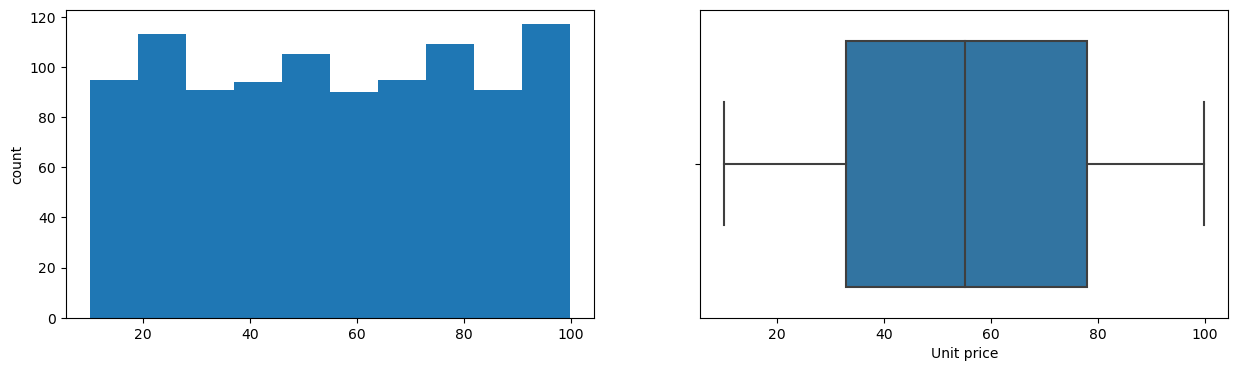

Quantity
Skew : 0.01


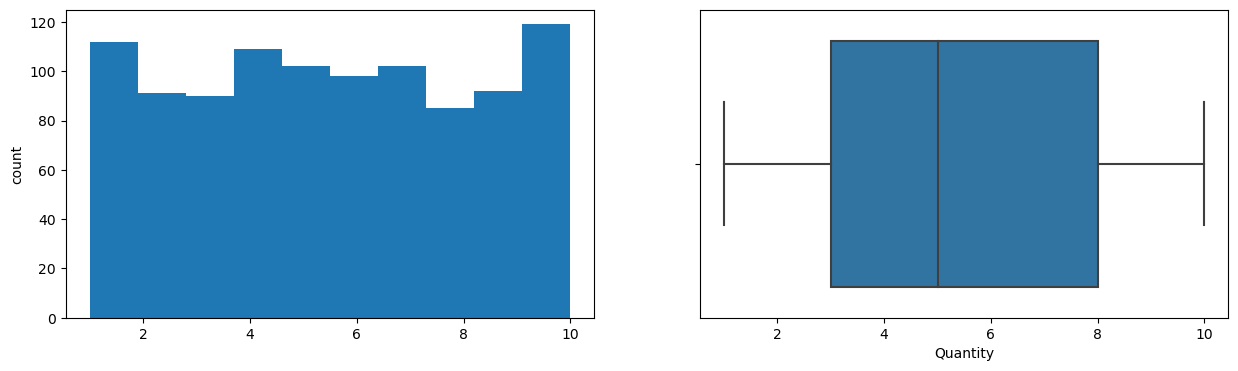

Tax 5%
Skew : 0.89


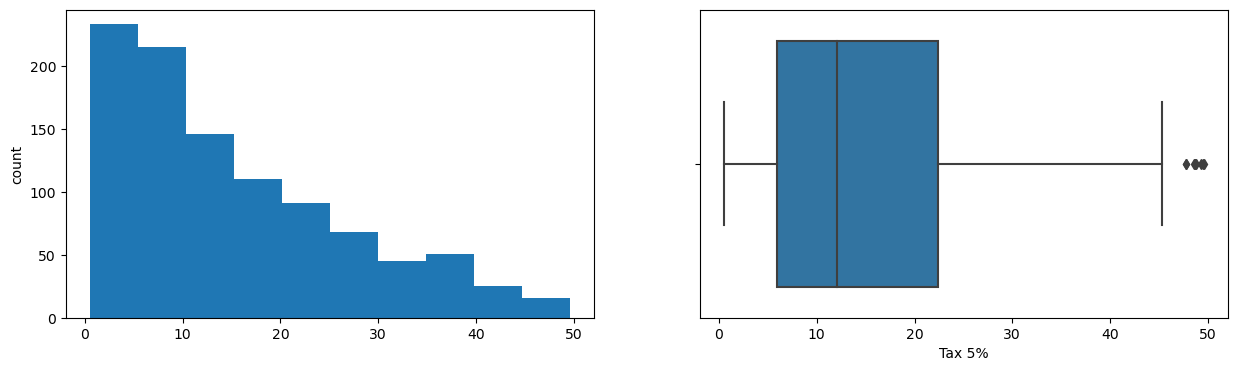

Total
Skew : 0.89


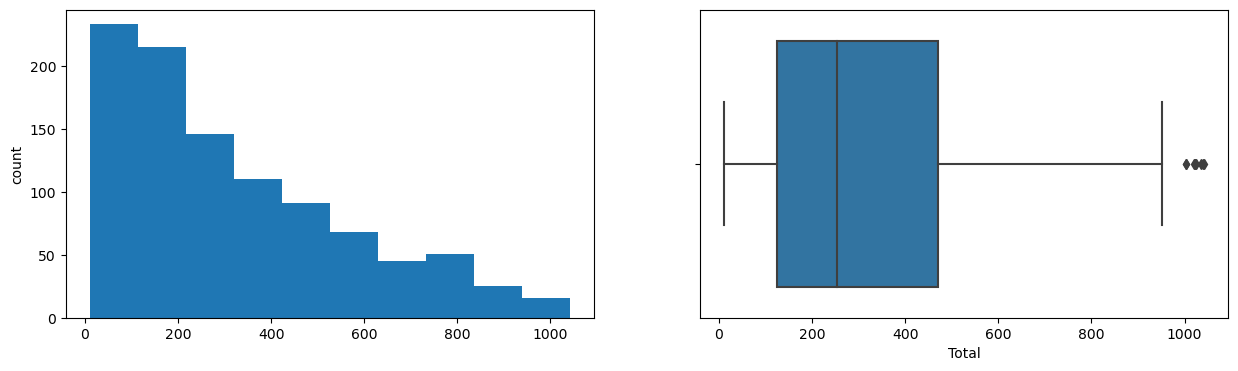

gross income
Skew : 0.89


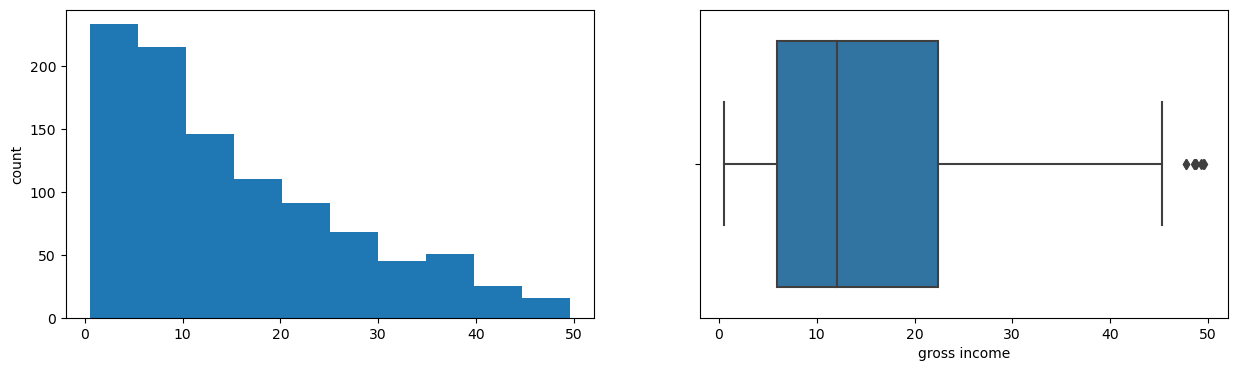

Rating
Skew : 0.01


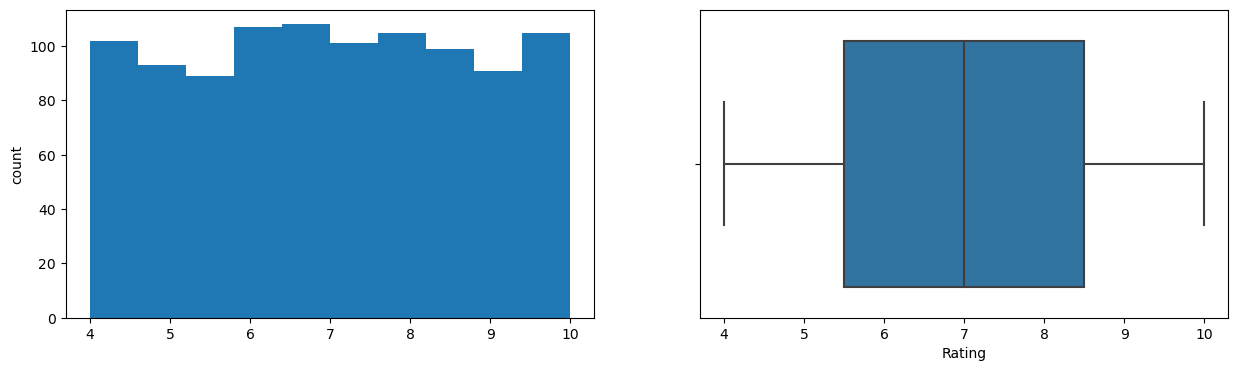

In [205]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Skewness measures the asymmetry of a distribution relative to its mean. It indicates whether the data are spread symmetrically or skewed to one side.
We can see that the variables unit price, quantity, gross margin percentage and rating have a symmetric or quasi-symmetric distribution because their skewness is very close to 0, while the variables cogs, Tax 5%, gross income and total have a positive skewness, ranging from moderate to strong because their skewness is between 0 and 1 and very close to 1.

### 7. Data Transformation

Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed.

Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

In [206]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [207]:
log_transform(data,['Tax 5%','Total','gross income'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Branch            1000 non-null   object 
 1   City              1000 non-null   object 
 2   Customer type     1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Product line      1000 non-null   object 
 5   Unit price        1000 non-null   float64
 6   Quantity          1000 non-null   int64  
 7   Tax 5%            1000 non-null   float64
 8   Total             1000 non-null   float64
 9   Date              1000 non-null   object 
 10  Payment           1000 non-null   object 
 11  gross income      1000 non-null   float64
 12  Rating            1000 non-null   float64
 13  Tax 5%_log        1000 non-null   float64
 14  Total_log         1000 non-null   float64
 15  gross income_log  1000 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory u

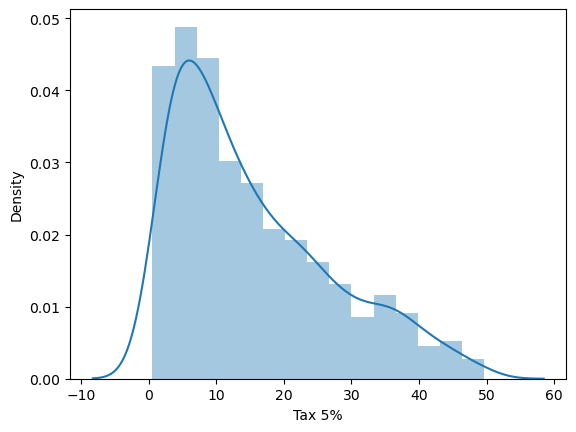

In [208]:
#Log transformation of the feature 'Tax 5%'
sns.distplot(data['Tax 5%'], axlabel='Tax 5%');

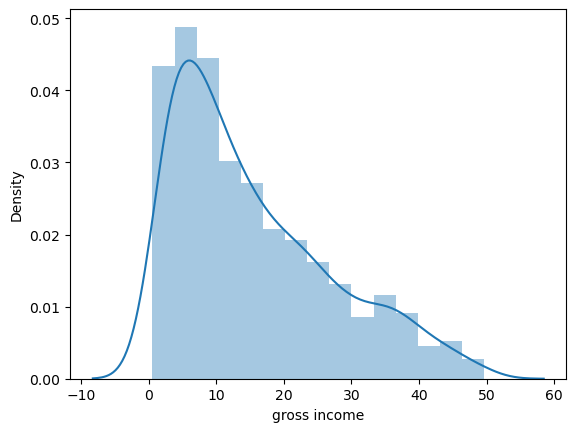

In [209]:
#Log transformation of the feature 'Tax 5%'
sns.distplot(data['gross income'], axlabel='gross income');

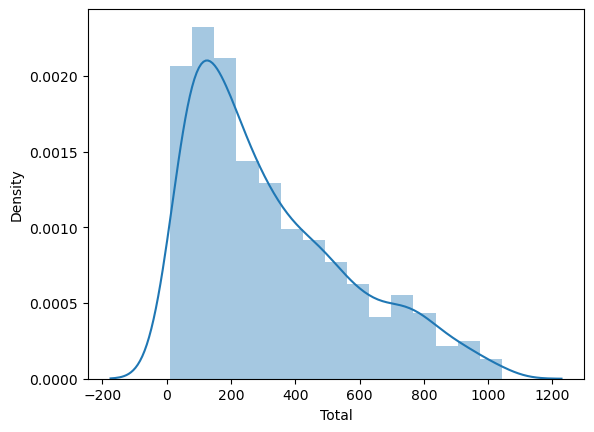

In [210]:
#Log transformation of the feature 'Total'
sns.distplot(data['Total'], axlabel='Total');

### 8. EDA Bivariate Analysis
Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

<Figure size 1300x1700 with 0 Axes>

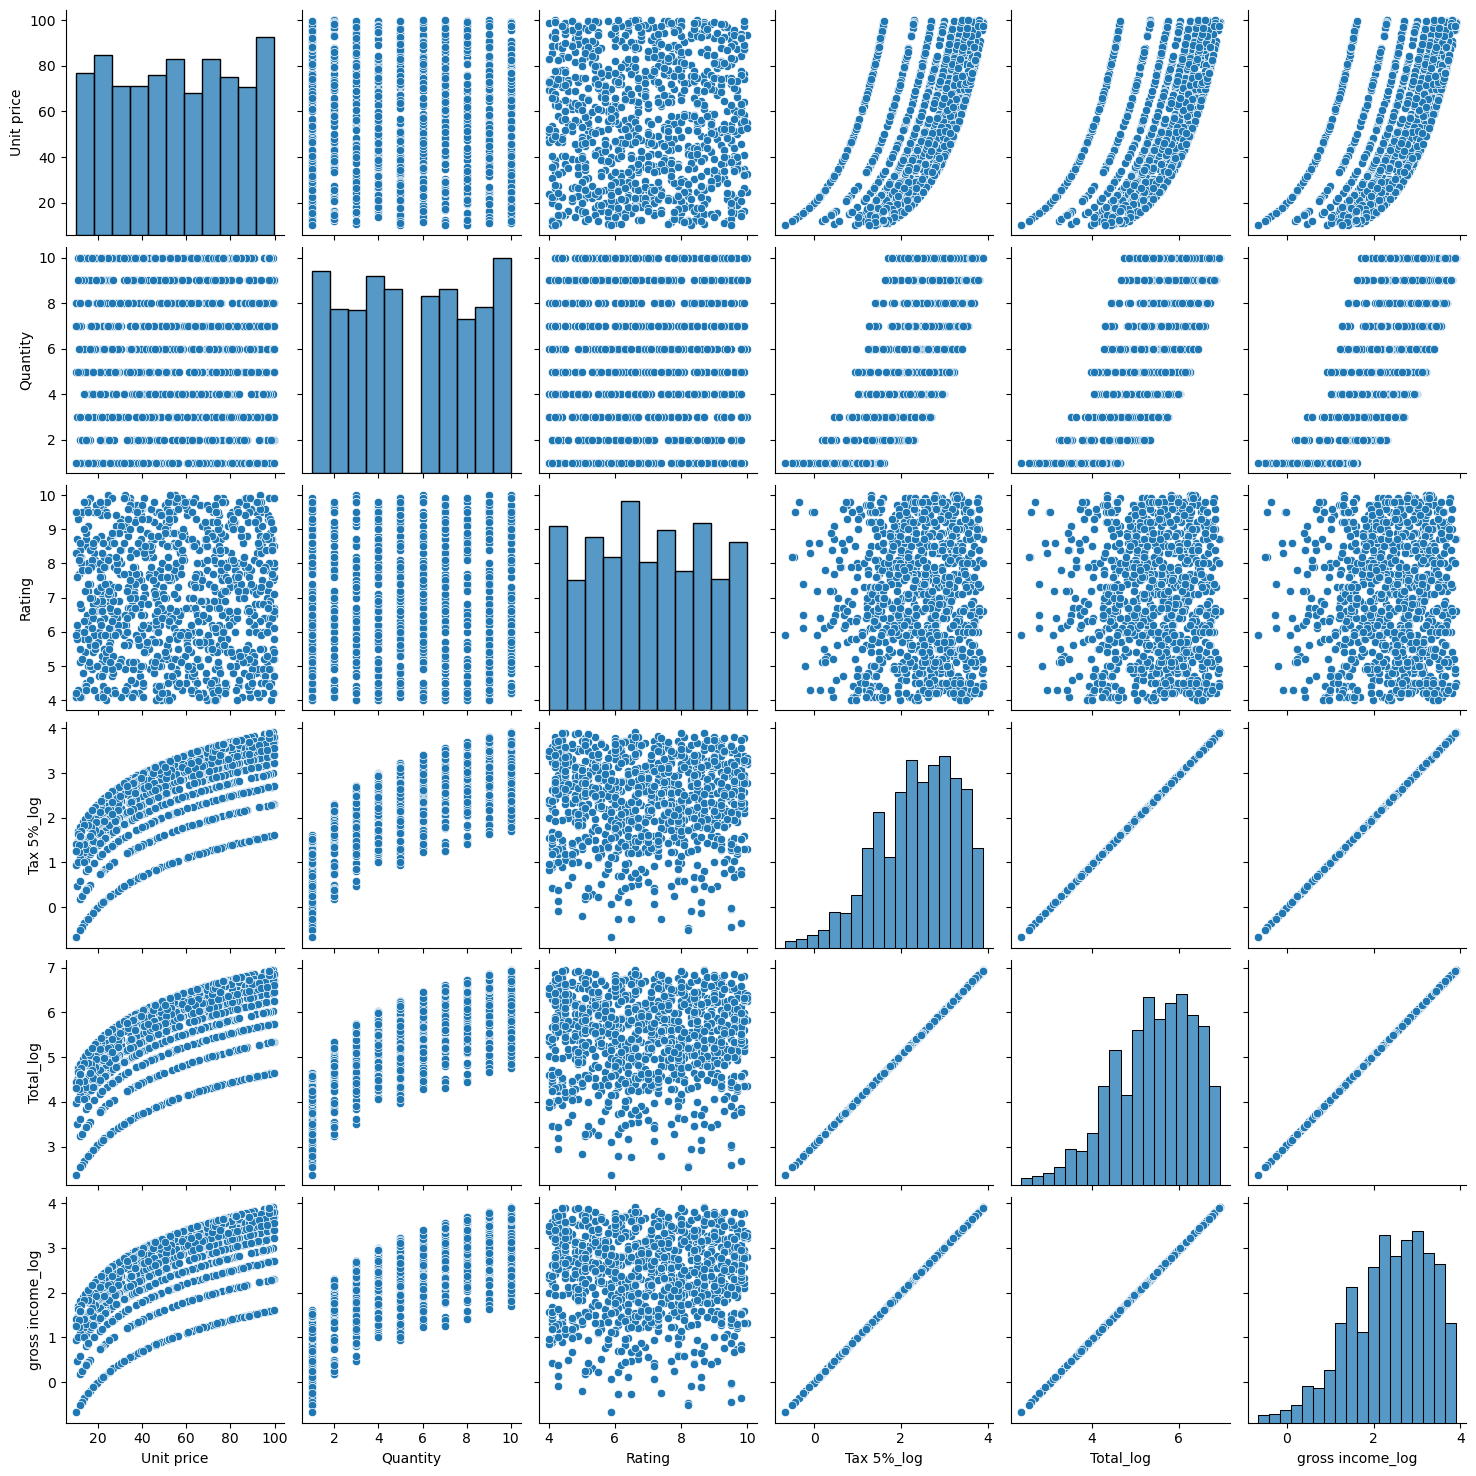

In [211]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Tax 5%','gross income','Total'],axis=1))
plt.show()

The Pair Plot provides the following insights:
The variables Total, Tax 5%, and Gross Income are perfectly linearly related in pairs, as the data are spread along a straight line. Furthermore, the variables Unit Price and Quantity are positively correlated with the variables Total, Tax 5%, and Gross imcome. However, the variable Rating is not correlated with any other variable. Similarly, Quantity has no correlation with Unit Price.

#### Categorical variables

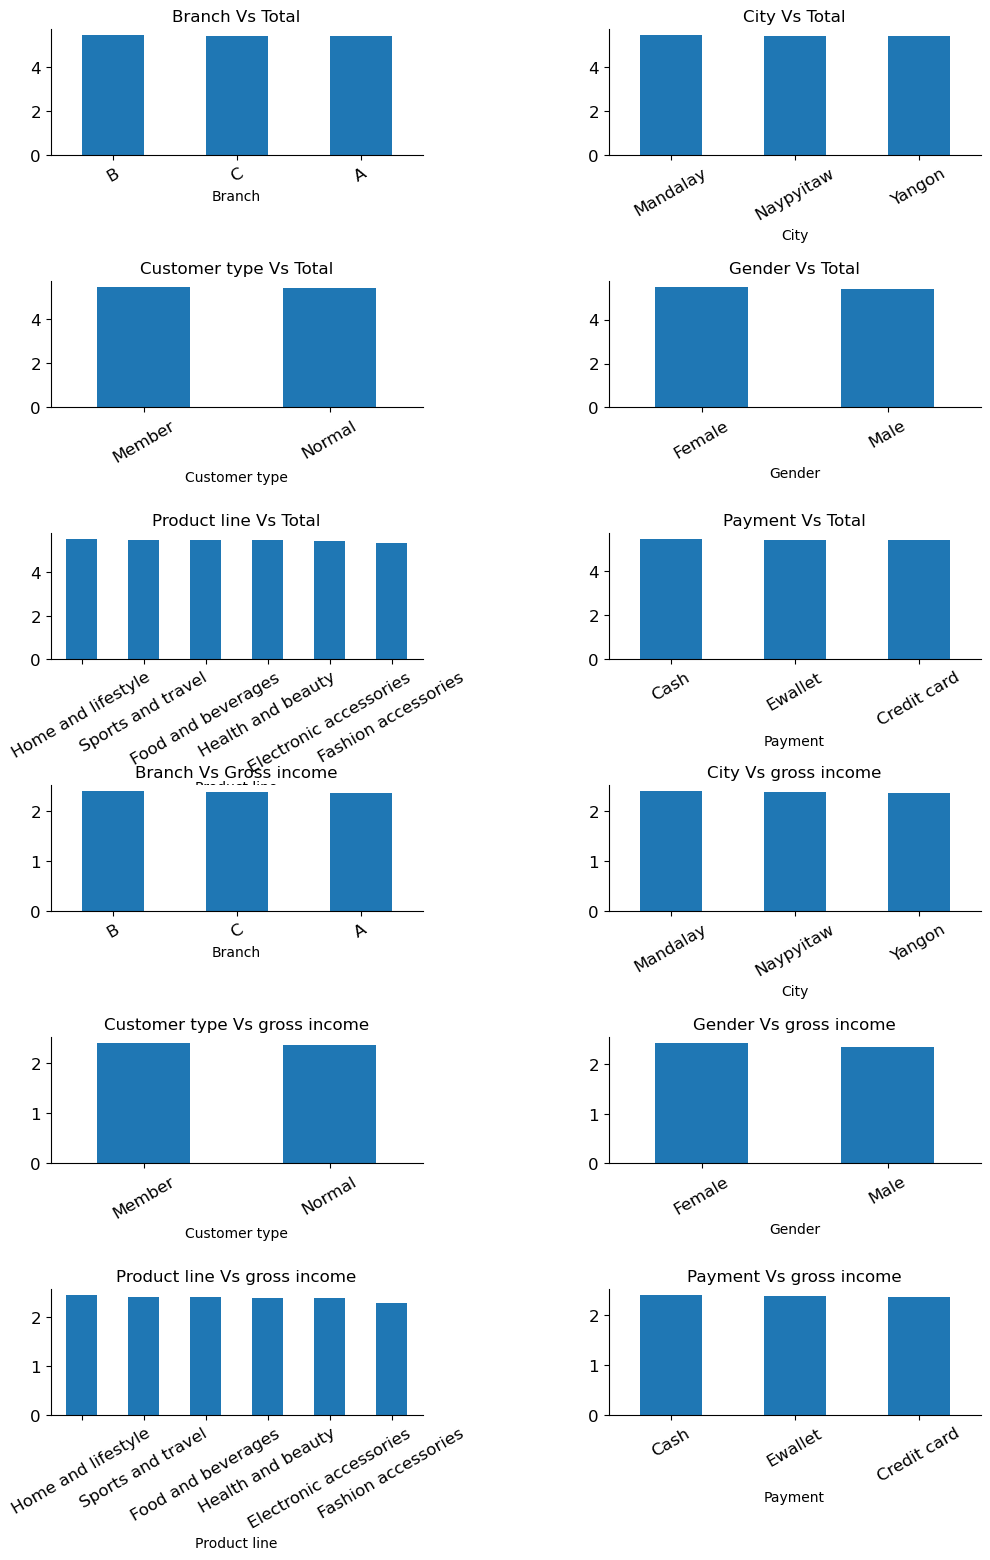

In [253]:
fig, axarr = plt.subplots(6, 2, figsize=(12, 18))
data.groupby('Branch')['Total_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Branch Vs Total", fontsize=12) 
data.groupby('City')['Total_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("City Vs Total", fontsize=12)
data.groupby('Customer type')['Total_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Customer type Vs Total", fontsize=12)
data.groupby('Gender')['Total_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Gender Vs Total", fontsize=12)
data.groupby('Product line')['Total_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Product line Vs Total", fontsize=12)
data.groupby('Payment')['Total_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Payment Vs Total", fontsize=12)
data.groupby('Branch')['gross income_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Branch Vs Gross income", fontsize=12)
data.groupby('City')['gross income_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("City Vs gross income", fontsize=12)
data.groupby('Customer type')['gross income_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[4][0], fontsize=12)
axarr[4][0].set_title("Customer type Vs gross income", fontsize=12)
data.groupby('Gender')['gross income_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[4][1], fontsize=12)
axarr[4][1].set_title("Gender Vs gross income", fontsize=12)
data.groupby('Product line')['gross income_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[5][0], fontsize=12)
axarr[5][0].set_title("Product line Vs gross income", fontsize=12)
data.groupby('Payment')['gross income_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[5][1], fontsize=12)
axarr[5][1].set_title("Payment Vs gross income", fontsize=12)
for i in range(6):
    for j in range(2):
        axarr[i][j].tick_params(axis='x', labelrotation=30) 
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()


#### Observation
We can see from the figure above that Food and Beverages have the highest sales volume, followed by Fashion Accessories and Health and Beauty, which have the lowest sales volume. Furthermore, Branch C has the highest sales volume, ahead of Branches A and B, which have roughly the same sales volume. Similarly, Naypyitaw City has the highest sales volume, which is where Branch C is located. Regarding gender, we can say that there are roughly the same number of men and women who transact in this supermarket. We also note that customers prefer eWallet for their transactions, followed by cash and finally credit cards.

### 9. EDA Multivariate Analysis
 Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

####  heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

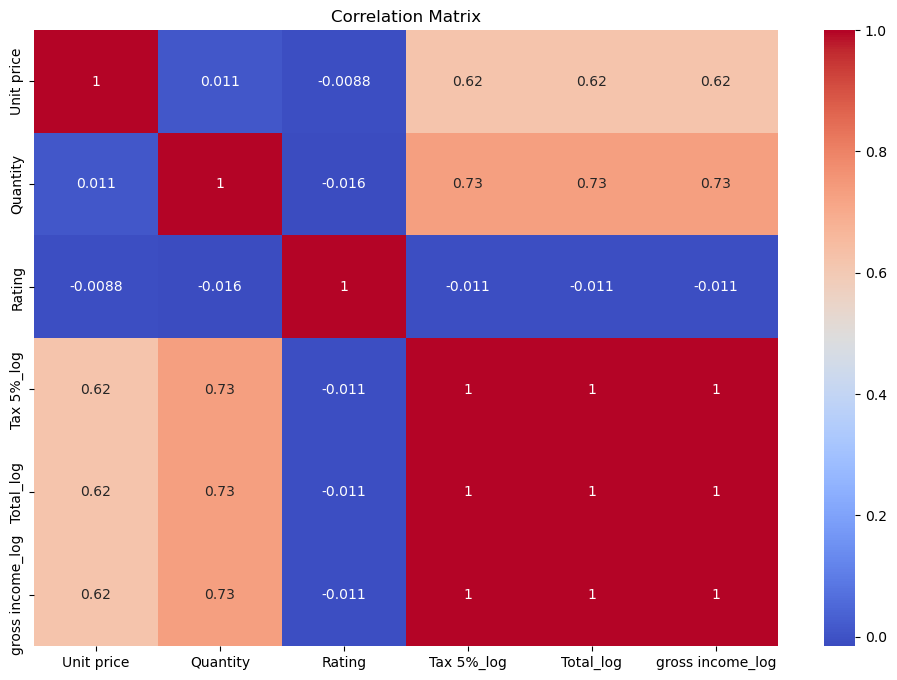

In [218]:
corr=data.drop(['Tax 5%','gross income','Total'],axis=1).corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The Heat map reveals that: the collinearity coefficients of the variables Tax 5%, gross income and Total taken two by two are worth 1, which reflects a strong collinearity relationship between these variables. Similarly, we note that the variables Unit price and Quantity are also linearly correlated with the previous variables with collinearity coefficients of 0.62 and 0.73 respectively with these variables.

### CONCLUSION
In summary, exploratory data analysis is a very important task in data analysis. It allows for an in-depth understanding of the dataset and the identification of patterns and trends in the different variables within it. Regarding our Supermarket dataset, we were able to arrive at the following results: Products in the Food and Beverages category generate the highest revenue, while Branch C, located in Naypyitaw City, records the highest sales volume. We also note that customers prefer eWallet, followed by cash, and lastly, credit cards for their transactions. We also observed a very strong correlation between the variables Total, Tax 5%, and Gross Income, which is quite natural given that these variables are mathematically linked by a linear relationship.